# Surface Corrections


In [1]:
from PeriFlakes import *
from SimDataDB import *
from matplotlib import pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]

In [2]:
H = 2.0 ; T = 1.0 ; E = 1.0 ; nu = 0.0;
solutions = {'uniaxial': (1, T*H*(2.0*nu**2+nu-1.0)/(E*(nu-1))),
             'isotropic':(1, T*H*(1.0-nu-2.0*nu**2)/E),
             'shear':    (0, 2.0*T*H*(1.0+nu)/E) }

In [3]:
L=1.0
N=20
delta= 1.5*2.0*L/float(N)
PB = PeriBlock(L,N,delta,ficticious=True,E=E,nu=nu)
PB.setbcs([(PB.right,0),(PB.left,0),(PB.bottom,1)], [(PB.ftop,[0,1])])

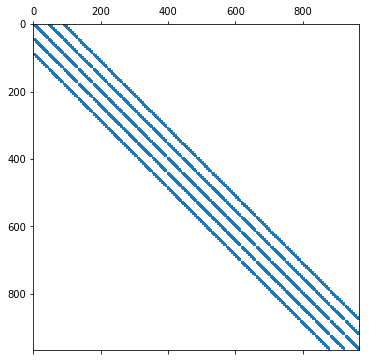

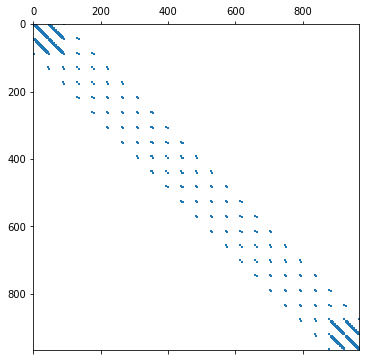

In [5]:
K,R = PB._assemble_KR("Fbased","cubic")
plt.spy(K,marker=',')
plt.show()
Kf,Rf = PB._assemble_KR_fict("trivial","Fbased","cubic")
plt.spy(Kf,marker=',')
plt.show()


In [ ]:
Kf,Rf = PB._assemble_KR_fict("bobaru","Fbased","cubic")
plt.spy(Kf,marker=',')
plt.show()

In [ ]:
for e in PB.HFictStencil4:
    print
    for l in PB.dm_PtVec.Get_List(e):
        for m in PB.dm_PtVec.Get_List(e):
            print Kf[l,m],
        print 

In [ ]:
for e in PB.HFictStencil3:
    print
    print Rf[PB.dm_PtVec.Get_List(e)]
    for l in PB.dm_PtVec.Get_List(e):
        for m in PB.dm_PtVec.Get_List(e):
            print Kf[l,m]/4.5,
        
        print 

## Finite difference stencil

These types of surface correction effects are implemented in [ficticious_kernels_pop.py](PeriFlakes/ficticious_kernels_pop.py). 
The finite difference stencil can be generalized by defined a strain between two points,
\begin{equation}
\epsilon^{ab} = \frac{\left(\mathbf{u}^a-\mathbf{u}^b\right)\cdot
	                  \left(\mathbf{x}^a-\mathbf{x}^b\right) }{
					  \left(\mathbf{x}^a-\mathbf{x}^b\right)\cdot
	                  \left(\mathbf{x}^a-\mathbf{x}^b\right) },
\end{equation}
and a normal between two points,
\begin{equation}
\mathbf{n}^{ab} = \frac{\mathbf{x}^a-\mathbf{x}^b}{\left|\mathbf{x}^a-\mathbf{x}^b\right|},
\end{equation}
where $a$ and $b$ are index arguments.
Then, in the direction normal to the surface, $\mathbf{n}^n = \mathbf{n}^{fo}$ and $\epsilon^n=\epsilon^{fo}$.
In the tangential direction, the normal and strain are averaged by both directions to obtain a central finite difference,
$\mathbf{n}^t = \left( \mathbf{n}^{+o} + \mathbf{n}^{o-} \right) / 2$ and 
$\epsilon^t = \left( \epsilon^{+o} + \epsilon^{o-} \right) / 2$. 
If the ficticious node is all the way at an end, only one of the winded directions is used. The final constraint is
\begin{equation}
0 = \epsilon^{n}\mathbf{n}^n + \nu \epsilon^t \mathbf{n}^t -
\bar{\mathbf{t}} * \frac{1}{E} \left[\begin{array}{cc}
1+\nu & 1-\nu^{2}\\\\
1-\nu^{2} & 1+\nu
\end{array} \right] \mathbf{n}^n
\end{equation}
where $*$ is elementwise multiplication.

In [ ]:
u = PB.solve("Silling","cubic",stab=2,fictmet='bobaru')
N = int(PB.NPart**0.5)
u = u.reshape(N,N,2)
x = PB.x.reshape(N,N,2)
#ax = plt.gca()
#ax.quiver(x[:,:,0],x[:,:,1],u[:,:,0],u[:,:,1],angles='uv',scale_units='xy',scale=10.0)
#ax.set_aspect('equal', 'datalim')

In [ ]:
plt.plot(x[:,N/2,1],u[:,N/2,1])
plt.plot([-1,1],[0,0.5*solutions['uniaxial'][1]])
plt.xlabel('y'); plt.ylabel('u_x');

In [ ]:
plt.plot(x[:,N/2,1],u[N/2,:,0],label='halfway');
plt.plot(x[:,N/2,1],u[-1,:,0],label='top');
plt.legend()
plt.xlabel('x'); plt.ylabel('u_x');